# Building the Zoo Map

In [1]:
# We'll use folium for our mapping
import folium

rectangles: list(tuple[str, str]) = [] # name to id mapping

In [2]:
# helper functions
north_of_map = -17.5
south_of_map = -213.5
west_of_map = 17.4
east_of_map = 243

def get_bounds(rectangle):
    southwest_corner_y =int(rectangle["north"] -1) * (2.26) + south_of_map
    height = rectangle["height"] * 2.26
    southwest_corner_x = (int(rectangle["east"])-1 )*2.258 + west_of_map 
    width = int(rectangle["width"])*2.258

    return [[southwest_corner_y , southwest_corner_x], [southwest_corner_y+height, southwest_corner_x+width]]
    
def draw_logo(claim, rectangle, m):
    img = folium.raster_layers.ImageOverlay(
        name="Claim",
        image=claim['logo'],
        bounds= get_bounds(rectangle),
        opacity=1.0,
        interactive=True,
        cross_origin=False,
        zindex=1,
        tooltip=claim["name"]
    )
    shade_rectangle(claim, rectangle, m, 0) # to provide tooltip and legend look-up
    img.add_to(m)

def shade_rectangle(claim, rectangle, m, opacity=.8):
    bounds = get_bounds(rectangle)
    # add some padding to the squares
    bounds = [[bounds[0][0]+.2, bounds[0][1]+.1], [bounds[1][0]-.2, bounds[1][1]-.1]]
    options = { 
        "stroke": False,
        "fill": True,
        "fillOpacity": opacity,
        "zindex": 1,
        "fillColor": "gray"
    }    
    r = folium.Rectangle(
        bounds=bounds,
        tooltip=claim["name"],
        **options
    )
    
    r.add_to(m)
    
    rectangles.append((claim["name"], r.get_name())  )  

def draw_claim(claim, m):
    if "tiles" in claim:
        for tile in claim["tiles"]:
            if "logo" in claim:
                draw_logo(claim, tile, m)
            else:
                shade_rectangle(claim, tile, m)


In [3]:
# Loading up the claims
import yaml
with open("claims.yaml") as f:
    claims = yaml.safe_load(f)


In [4]:
print(claims)

[{'name': 'ATA Engineering', 'tiles': [{'north': 25, 'east': 21, 'width': 2, 'height': 1}]}, {'name': 'BASF', 'tiles': [{'north': 80, 'east': 49, 'width': 4, 'height': 4}], 'logo': 'images/BASF-Logo.png'}, {'name': 'Bolte - Chris and Betty', 'tiles': [{'north': 25, 'east': 9, 'width': 1, 'height': 2}]}, {'name': 'Cepeda Systems & Software Analysis', 'tiles': [{'north': 38, 'east': 49, 'width': 2, 'height': 1}, {'north': 20, 'east': 49, 'width': 1, 'height': 2}]}, {'name': 'Crocker Family', 'tiles': [{'north': 40, 'east': 46, 'width': 2, 'height': 2}]}, {'name': 'Daniel - Rhett and Brenda', 'tiles': [{'north': 34, 'east': 47, 'width': 2, 'height': 1}]}, {'name': 'Hardiman - Pete', 'tiles': [{'north': 34, 'east': 44, 'width': 2, 'height': 1}]}, {'name': 'Hardiman - Reed', 'tiles': [{'north': 36, 'east': 49, 'width': 2, 'height': 1}]}, {'name': 'Holcombe - Tim and Sharon', 'tiles': [{'north': 54, 'east': 13, 'width': 3, 'height': 3}]}, {'name': 'Johnson - Leif and Debbie', 'tiles': [{'nor

In [5]:
attr = "&copy; https://nalzs.org"
tiles = folium.TileLayer("http://localhost:8000/tiles/{z}/tile_{x}_{y}.png", attr=attr, no_wrap=True, min_zoom = 1, max_zoom=4, max_native_zoom=4)


In [6]:
zoo_map = folium.Map(location=[-120, 135], tiles=tiles, zoom_start=2, min_zoom=2, max_zoom=4, attributionControl=0, 
                    crs="Simple")


In [7]:
for claim in claims:
    draw_claim(claim, zoo_map)


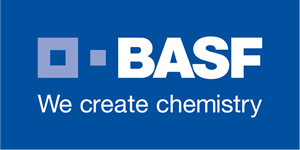

In [8]:
zoo_map


In [13]:
import json
from html import escape
with open("zoo_map.tmpl") as f:
    template = f.read()

scripts = zoo_map.get_root().script.render()
scripts += "const mapObj = " + zoo_map.get_name() + "; const patrons = [" + ",".join('{name: "'+escape(name)+'", rectangle: ' + rectangle+'}' for name, rectangle in rectangles) + "]";
with open("zoo_map.html", "w") as f:
    f.write(template.replace("$HEADER$", zoo_map.get_root().header.render())
                    .replace("$SCRIPT$", scripts)
                    .replace("$BODY$", zoo_map.get_root().html.render()))
    

In [14]:
zoo_map.get_name()

'map_b43999710db1596724850486e9df964f'